In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,155
CNG,17


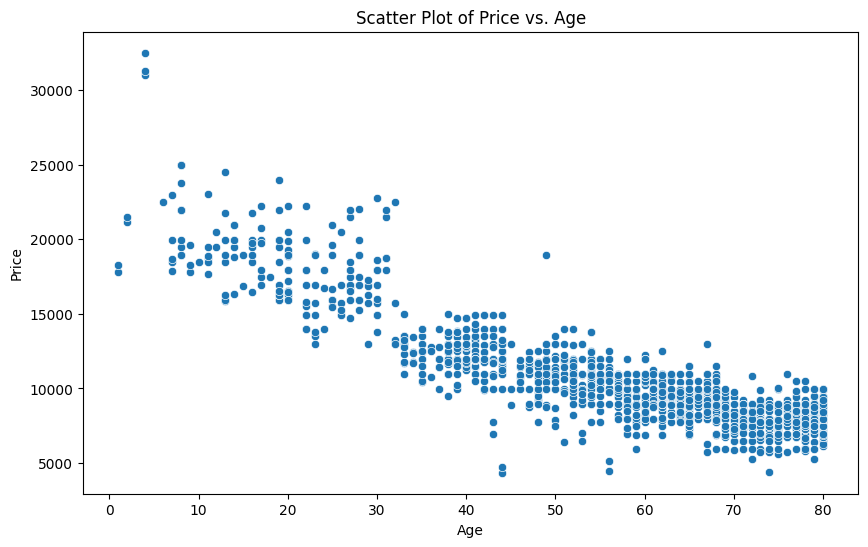

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title('Scatter Plot of Price vs. Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

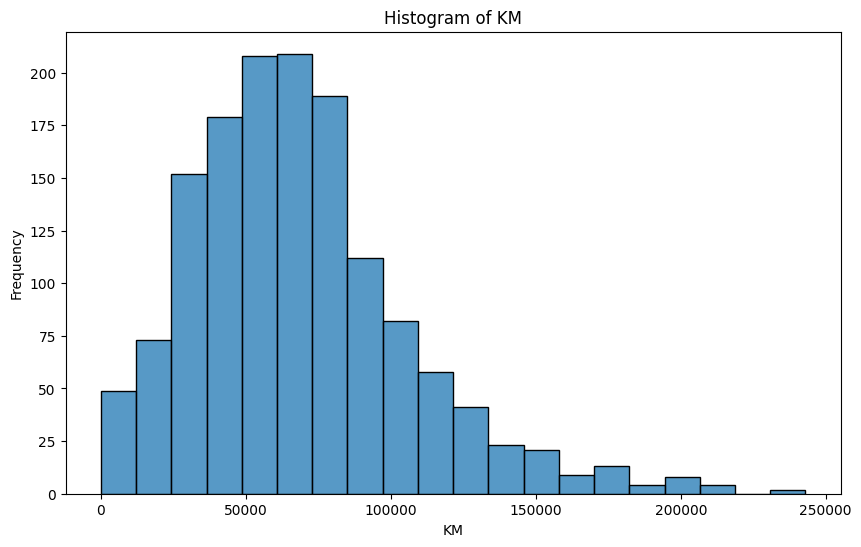

In [ ]:

    plt.figure(figsize=(10, 6))
    sns.histplot(df['KM'], bins=20)
    plt.title('Histogram of KM')
    plt.xlabel('KM')
    plt.ylabel('Frequency')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


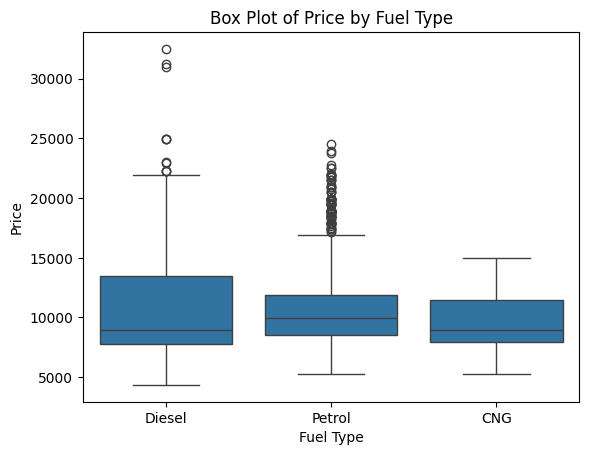

In [ ]:
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Box Plot of Price by Fuel Type')
plt.show()

In [ ]:
    df.isnull().sum()
    df = pd.get_dummies(df, columns=['Fuel_Type'], prefix='Fuel')

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[-1.48411410e+02 -1.95870740e-02  9.17507927e+02  2.17674520e+02]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2882550.1989523047
R-squared: 0.7839619413363526


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Lasso MSE:', mse_lasso)




Lasso MSE: 2882514.1322619454


In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Ridge MSE:', mse_ridge)

Ridge MSE: 2882542.059934413


In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5)
lasso_cv.fit(X_train, y_train)
print('Best alpha for Lasso:', lasso_cv.alpha_)

Best alpha for Lasso: 10.0


What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are data preprocessing techniques to rescale features.
Normalization: Scales data to a range (usually 0-1). Standardization: Centers data around 0 with a standard deviation of 1.

What techniques can be used to address multicollinearity in multiple linear regression?

Feature Selection: Remove one or more of the correlated features.
Regularization: Use techniques like Lasso or Ridge regression.
